## Library Project Final Demo
### BY: Nithya,Srikar, Nick

We built an information retrieval system around study spaces and libraries with more personalized recommendations and filters based on usage patterns. We have organized hourly library activity information and descriptions of libraries as resources to meet this goal. Resource descriptions of time of day and attributes & categories of the libraries themselves have been organized to meet this goal.

We answer questions like the following:

**What's the best time for me to visit the library?**

We wish to return ranked recommendations that suggest times and alternatives based on preferences. E.g., ‘I wish for a quieter study time in the evening’ would return best the timings to visit; **



In [1]:
#import required functions
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import datetime
from datetime import date
from datetime import date

In [2]:
#read the data
df = pd.read_csv('HourlyTraffic_Compiled_v3.csv')

In [3]:
df[(df.year == 2017) & (df.month == 11) & (df.building == 'MOFF')].week_num.unique()

array([44, 45, 46, 47, 48], dtype=int64)

In [4]:
df.head()

,date,region,facility,entrance,entries,exits,filename,hourly_change,weekday_num,weekday,hour,day,month,week_num,year,building,full_name,num_present,cumsum_entries
0,2018-07-27 00:00:00,UC Berkeley,AHC Library,AHC Back,0,0,HourlyTraffic-2018-07-27.xlsm,0,4,Friday,0,27,7,30,2018,AHC,Art History/Classics Library,0,0
1,2018-07-27 01:00:00,UC Berkeley,AHC Library,AHC Back,0,0,HourlyTraffic-2018-07-27.xlsm,0,4,Friday,1,27,7,30,2018,AHC,Art History/Classics Library,0,0
2,2018-07-27 02:00:00,UC Berkeley,AHC Library,AHC Back,0,0,HourlyTraffic-2018-07-27.xlsm,0,4,Friday,2,27,7,30,2018,AHC,Art History/Classics Library,0,0
3,2018-07-27 03:00:00,UC Berkeley,AHC Library,AHC Back,0,0,HourlyTraffic-2018-07-27.xlsm,0,4,Friday,3,27,7,30,2018,AHC,Art History/Classics Library,-1,2
4,2018-07-27 04:00:00,UC Berkeley,AHC Library,AHC Back,0,0,HourlyTraffic-2018-07-27.xlsm,0,4,Friday,4,27,7,30,2018,AHC,Art History/Classics Library,0,0


In [5]:
df['year_month'] = (df.year.astype(str) + df.month.astype(str))
df.year_month.unique()

array(['20187', '20188', '20189', '201810', '20177', '20178', '20179',
       '201710', '201711', '201712', '20181', '20182', '20183', '20184',
       '20185', '20186'], dtype=object)

In [6]:
#get a table with all libraries and features
lib_features = pd.read_excel('Library Features.xlsx')

In [7]:
lib_features.head()

,Building,Facility,open_weekends,open_late,quiet_study,group_study,reservable rooms,food_allowed,address,gps_lat,gps_long,open,close,notes
0,AHC,AHC Library,1,0,1,1,0,0,Art History/Classics Library\n308 Doe Library\...,37.872249,-122.259433,9,21,part of DOE
1,ANTH,ANTH Library,0,0,1,0,0,1,The George and Mary Foster Anthropology Librar...,37.869843,-122.255285,9,20,NaN
2,DOE,BANC Library,1,0,1,1,0,1,Charles Franklin Doe Memorial Library\nUnivers...,37.872183,-122.259593,10,17,NaN
3,DOE,Main Stacks,1,0,1,1,0,1,198 Main (Gardner) Stacks\nUniversity of Calif...,40.741895,-73.989308,0,24,NaN
4,VLSB,BIOS Library,1,0,1,1,0,0,"Marian Koshland Bioscience, Natural Resources ...",37.871490,-122.262141,9,22,NaN


In [8]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [9]:
#@widgets.interact_manual(
#    Purpose=['Group Study','Quiet Study'],Reservable_Rooms = ['Yes','No'] )
def get_values(selection):
    if selection == 1:
        return [1]
    else:
        return [0,1]

In [10]:
#get a list of all buildings
lib_list = lib_features.Building.unique().tolist()

In [11]:
#get a list of all the times

time = ['12AM','1AM','2AM','3AM','4AM','5AM','6AM','7AM','8AM','9AM','10AM','11AM','12PM','1PM','2PM','3PM','4PM','5PM','6PM','7PM','8PM','9PM','10PM','11PM']

In [12]:
def lib_recommend(Group_Study, Reservable_Rooms, Quiet_Study):
    Reservable_Rooms = get_values(Reservable_Rooms)
    Group_Study = get_values(Group_Study)
    Quiet_Study = get_values(Quiet_Study)
    lib_list = lib_features[(lib_features.group_study.isin(Group_Study)) 
                           & (lib_features['reservable rooms'].isin(Reservable_Rooms))
                           & (lib_features.quiet_study.isin(Quiet_Study))]['Building'].unique()
    return lib_list.tolist()

In [13]:
group_study_widget = widgets.Checkbox(value=False,description='Group Study',disabled=False)
reservable_rooms_widget = widgets.Checkbox(value=False,description='Reservable Rooms',disabled=False)
quiet_study_widget = widgets.Checkbox(value=False,description='Quiet Study',disabled=False)
lib_list_widget = widgets.SelectMultiple(options=lib_list,description='Suggested Libraries:',disabled=False)
date_widget = widgets.DatePicker(description='Pick a Date',value = date.today(),disabled=False)

def update(*args):
    lib_list_widget.options = lib_recommend(group_study_widget.value,reservable_rooms_widget.value,quiet_study_widget.value)
    
#update the list of libraries based on the user selection    
group_study_widget.observe(update)
reservable_rooms_widget.observe(update)
quiet_study_widget.observe(update)

In [14]:
def lib_random(Group_Study,Reservable_Rooms,Quiet_Study,Lib_List,Date):
    
    #convert the Lib list parameter to a list
    libs = list(lib_list_widget.value)
    plt.figure(figsize=(14,8))
    #print(Date.weekday())
    
    #subset the data based on the user selection and get the running total for that day
    df_grouped = df[(df.month == Date.month) & (df.day == Date.day) & (df.year == (Date.year-1))].groupby(['building','year','month','day','hour']).sum().groupby(level = [0]).cumsum()
    
    print('\033[1m' + 'The libraries closest to you are:')
    for i in find_closest_lib(coords_1, lib_features, 3):
        print(str(i))
    print('\033[0m')
        
    #for each library that has been selected plot the grap
    for i in libs:
        
        if(i in df_grouped.index.get_level_values('building').unique()):
            traffic = df_grouped.loc[i.rstrip()].hourly_change
            traffic = np.where(traffic <0,0,traffic)
            plt.plot(time,traffic, label = i)
        else:
            print('There is no data for the library ' + i)
    plt.xlabel('Time')
    plt.ylabel('Traffic')
    plt.legend()
    plt.grid()


In [15]:
def get_best_libraries(df, period, date):
    # hard coded
    week_num = int(date.isocalendar()[1])
    day = date.strftime('%A')
    print(week_num)
    print(day)
    period_mapping = {
                     'morning': {'min': 8 ,'max': 12}, 
                      'afternoon':{'min': 12 ,'max': 16},
                      'evening': {'min': 16 ,'max': 19}, 
                      'night':{'min': 19 ,'max': 23} # Change this to 24
                     }
    freq_data_sub = df[(df.week_num == week_num) & (df.year == 2017) & (df.weekday == day)].groupby(['hour', 'building']).sum().groupby(level = [0]).cumsum()
    freq_data_sub = freq_data_sub.reset_index()
    #print(freq_data_sub)
    freq_data_sub = freq_data_sub.loc[(freq_data_sub['hour'] >= period_mapping[period]['min']) & (freq_data_sub['hour'] < period_mapping[period]['max'])]
    #freq_data_sub = freq_data_sub.sort_values('hourly_change', ascending = True)
    #best_times = freq_data_sub['hour']
    #print(freq_data_sub)
    lib_best_times = {}
    print(np.unique(freq_data_sub['building'].values))
    for lib in np.unique(freq_data_sub['building'].values):
        lib_data_sub = freq_data_sub.loc[(freq_data_sub['building'] == lib),:]
        lib_data_sub = lib_data_sub.sort_values('hourly_change', ascending = True)
        lib_best_times[lib] = {'best_times': lib_data_sub['hour'].values}
    
    
    return lib_best_times

In [16]:
def get_date(date,lib_codes,period):
    print(date)
    times = get_best_time(df, lib_codes, period, date)
    print(times)

In [17]:
coords_1 = (37.8713408,-122.2585)
coords_2 = (52.406374, 16.9251681)

import math
# https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude

def distance(origin, destination):

    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d
distance(coords_1, coords_2)



def find_closest_lib(coord, lib_data, k = 1):
    distances = []
    for i in range(len(lib_data)):
        distances.append(distance(coord, (
        
        lib_data.loc[i, 'gps_lat'], lib_data.loc[i, 'gps_long']
        
        )))
    lib_data_sub = lib_data
    lib_data_sub['distance'] = distances
    return lib_data_sub.sort_values('distance', ascending = True)['Building'][:k].values

In [18]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine

def calc_similarity(df, features, libcode):
    n = 4 # number of results to return
    
    # Drop duplicate building codes
    df = df.drop_duplicates(subset=['Building'], keep='first')
    # fill missing with 0 and normalize features
    X = df[features].fillna(0)
    X = X.values # convert to numpy array
    X = X / X.max(axis=0) # Scale columnns between 0 and 1
    
    # Index of target library
    lib = df[feats].loc[df['Building']==libcode]
    target_idx = lib.index[0]
    lib = X[target_idx] # (3,)
    
    # Names
    names = df['Building'].values
    names = names[:, np.newaxis] 
    
    # Calculate Similarity
    #X = np.delete(X, (target_idx), axis=0).shape
    sim_matrix = cosine_similarity(X)
    #print(sim_matrix.shape)
    
    # Create DataFrame from Similiaryt Matrix
    #sim_matrix = np.append(sim_matrix, names,1) # Append names to array
    sim_df = pd.DataFrame(sim_matrix)
    names = np.squeeze(names, axis=(1,))
    sim_df.columns = list(names)
    sim_df['Building'] = names
    # return sim_df # similarity Matrix with labels
    
    # Filter Similarity matrix to Library of Interest
    target_col = sim_df[['Building', libcode]]
    target_col = target_col.sort_values(by=[libcode], ascending=False)
    target_col = target_col.iloc[1:n+1]
    
    result = list(target_col['Building'].values) # list of results
    return result

# Example of use
feats = ['close','quiet_study','group_study']

In [19]:
import datetime

def get_best_time(df, library_codes, period, date):
    # hard coded
    week_num = int(date.isocalendar()[1])
    day = date.strftime('%A')
    #print(week_num)
    #print(day)
    period_mapping = {
                     'morning': {'min': 8 ,'max': 12}, 
                      'afternoon':{'min': 12 ,'max': 16},
                      'evening': {'min': 16 ,'max': 19}, 
                      'night':{'min': 19 ,'max': 23} # Change this to 24
                     }
    freq_data_sub = df[(df.week_num == week_num) & (df.year == date.year -1) & (df.weekday == day) & (df.building == library_codes) ].groupby(['hour','building']).sum().groupby(level = [0]).cumsum()
    #print(freq_data_sub.head())
    freq_data_sub = freq_data_sub.reset_index()
    #print(freq_data_sub)
    freq_data_sub = freq_data_sub.loc[(freq_data_sub['hour'] >= period_mapping[period]['min']) & (freq_data_sub['hour'] < period_mapping[period]['max'])]
    freq_data_sub = freq_data_sub.sort_values('hourly_change', ascending = True)
    
    lib_best_times = {}
    #print(np.unique(freq_data_sub['building'].values))
    for lib in np.unique(freq_data_sub['building'].values):
        lib_data_sub = freq_data_sub.loc[(freq_data_sub['building'] == lib),:]
        lib_data_sub = lib_data_sub.sort_values('hourly_change', ascending = True)
        #lib_best_times[lib] = {'best_times': lib_data_sub['hour'].values}
        lib_best_times[lib] = lib_data_sub['hour'].values
        print()
        print('\033[1m' +'The best visiting times for ' + lib + ' is:')
        print('\033[0m')
        for i in lib_best_times[lib]: 
            print(str(i) + ':00 hrs to ' + str(i+1)+':00 hrs')
            
        print()    
        print('\033[1m' +'Other similar libraries') 
        print('\033[0m')
        for i in calc_similarity(lib_features, feats, library_codes):
            if(i != library_codes):
                print(i)
        print()
              
    #best_times = freq_data_sub['hour'].values
    # print(freq_data_sub)
    #return lib_best_times

In [23]:
interact(lib_random,Group_Study = group_study_widget , Reservable_Rooms = reservable_rooms_widget, Quiet_Study = quiet_study_widget, Lib_List = lib_list_widget, Date = date_widget)

interactive(children=(Checkbox(value=False, description='Group Study'), Checkbox(value=False, description='Res…

<function __main__.lib_random(Group_Study, Reservable_Rooms, Quiet_Study, Lib_List, Date)>

In [24]:
date_widget = widgets.DatePicker(description='Pick a Date',value = date.today(),disabled=False)
period_widget = widgets.Dropdown(options= ['morning','afternoon','evening','night'],description='Period:',disabled=False)
lib_widget = widgets.Dropdown(options=lib_list,description='Library:',disabled=False)

interact(get_date, date = date_widget, period = period_widget,lib_codes = lib_widget)

interactive(children=(DatePicker(value=datetime.date(2018, 12, 13), description='Pick a Date'), Dropdown(descr…

<function __main__.get_date(date, lib_codes, period)>

In [21]:
interact(lib_random,Group_Study = group_study_widget , Reservable_Rooms = reservable_rooms_widget, Quiet_Study = quiet_study_widget, Lib_List = lib_list_widget, Date = date_widget)

interactive(children=(Checkbox(value=False, description='Group Study'), Checkbox(value=False, description='Res…

<function __main__.lib_random(Group_Study, Reservable_Rooms, Quiet_Study, Lib_List, Date)>

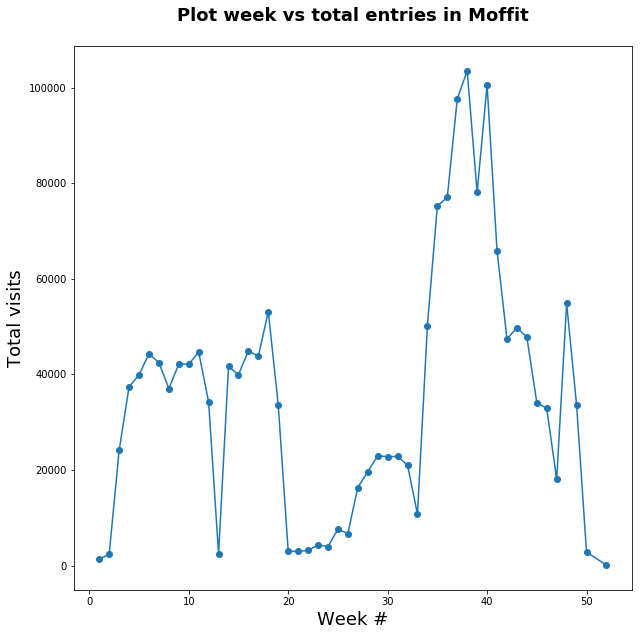

In [26]:
# Time series of week and traffic
ts = df.loc[((df.year == 2017) | (df.year == 2018)) & (df.building == 'MOFF'),:].groupby(['week_num']).sum()
ts = ts.reset_index()
# Histogram plot
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(ts['week_num'].values, ts['entries'].values)
ax.plot(ts['week_num'].values, ts['entries'].values)
ax.set_title('Plot week vs total entries in Moffit', fontweight="bold", size=18, pad = 25)
ax.set_xlabel('Week #', size = 18)
ax.set_ylabel('Total visits', size = 18)
plt.show()